In [27]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [28]:
# Constants
TEST_DATA_DIR = 'data/test'
TRAIN_DATA_DIR = 'data/train'
TRAIN_DATA_LABELS = 'data/train.csv'

IMG_WIDTH = 32
IMG_HEIGTH = 32
BATCH_SIZE = 32
GENERATOR_SEED = 1910
EPOCHS = 10

In [29]:
# Data Generator tutorial: https://towardsdatascience.com/keras-data-generators-and-how-to-use-them-b69129ed779c
train_datagen = ImageDataGenerator(validation_split=0.2)
test_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGTH),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode='binary',
    seed=GENERATOR_SEED,
    subset='training'
    )
    
validation_generator = train_datagen.flow_from_directory(
    TRAIN_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGTH),
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    class_mode='binary',
    seed=GENERATOR_SEED,
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    TEST_DATA_DIR,
    target_size=(IMG_WIDTH, IMG_HEIGTH),
    color_mode="rgb",
    class_mode=None,
    batch_size=1,
    seed=GENERATOR_SEED,
)

Found 14001 images belonging to 2 classes.
Found 3499 images belonging to 2 classes.
Found 4000 images belonging to 1 classes.


In [30]:
# Build VGG model.
# TODO: Kernel size
# https://machinelearningmastery.com/how-to-implement-major-architecture-innovations-for-convolutional-neural-networks/
def add_vgg_block(model, n_filters, n_conv):
    # Add conv layers
    for _ in range(n_conv):
        model.add(Conv2D(n_filters, (3, 3), padding='same', activation='relu'))
    # Add max pooling layers
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    return model

In [31]:
input_layer = Input(shape=(IMG_HEIGTH, IMG_WIDTH, 3))

vgg_model = Sequential()
vgg_model.add(input_layer)
vgg_model = add_vgg_block(vgg_model, 64, 2)
vgg_model.add(Flatten())
vgg_model.add(Dense(1, activation='sigmoid'))
vgg_model.summary() 

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16385     
Total params: 55,105
Trainable params: 55,105
Non-trainable params: 0
_________________________________________________________________


In [32]:
vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#TODO: Hoe wordt de validate uitgevoerd? Recall precision.
vgg_history = vgg_model.fit(x=train_generator, epochs=EPOCHS, validation_data=validation_generator)

Epoch 1/10
438/438 [==============================] - 35s 80ms/step - loss: 1.0664 - accuracy: 0.9026 - val_loss: 0.2758 - val_accuracy: 0.9300
Epoch 2/10
438/438 [==============================] - 35s 79ms/step - loss: 0.1338 - accuracy: 0.9503 - val_loss: 0.1192 - val_accuracy: 0.9646
Epoch 3/10
438/438 [==============================] - 38s 87ms/step - loss: 0.0909 - accuracy: 0.9660 - val_loss: 0.1030 - val_accuracy: 0.9594
Epoch 4/10
438/438 [==============================] - 42s 95ms/step - loss: 0.0853 - accuracy: 0.9692 - val_loss: 0.0576 - val_accuracy: 0.9789
Epoch 5/10
438/438 [==============================] - 49s 112ms/step - loss: 0.0561 - accuracy: 0.9804 - val_loss: 0.0508 - val_accuracy: 0.9806
Epoch 6/10
438/438 [==============================] - 47s 108ms/step - loss: 0.1213 - accuracy: 0.9559 - val_loss: 0.1393 - val_accuracy: 0.9486
Epoch 7/10
438/438 [==============================] - 48s 109ms/step - loss: 0.1097 - accuracy: 0.9610 - val_loss: 0.1042 - val_accura

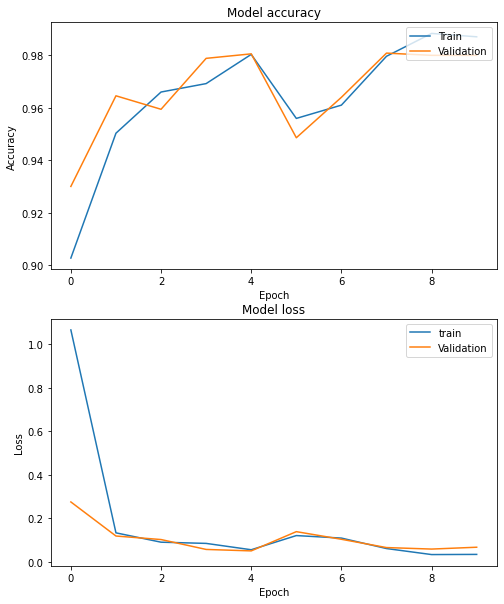

In [33]:
# Visualize model history
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

axes[0].plot(vgg_history.history['accuracy'])
axes[0].plot(vgg_history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper right')

axes[1].plot(vgg_history.history['loss'])
axes[1].plot(vgg_history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['train', 'Validation'], loc='upper right')